In [1]:
#Modules to install via pip pandas,ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pprint import pprint
import os
import import_ipynb
import sys
import kmeans
sys.path.append('../')
from functions import *
from trace_analysis import *
from plots import *
from pandas.plotting import scatter_matrix
import cmath as math
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
# scipy
from scipy.cluster.vq import kmeans,vq,whiten
import sklearn.metrics as sm
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline
import random
random.seed(6666)

In [30]:
directory=os.getcwd()[:-6]+ "iot-lab-25nodes/traces/"
print(directory)
#+ "/iot-lab-25nodes/traces/"
tracefiles=[
    "2019-01JAN-30-1",
    "2019-01JAN-30-1b169",
    "2019-01JAN-30-1b169b153b182",
    "2019-01JAN-30-2",
    "2019-01JAN-30-3b113b122b145b166b185"
]

data = importIOTData(directory,tracefiles)

/home/fedebyes/Workspace/Master Thesis/iot-netprofiler/iot-lab-25nodes/traces/
Importing /home/fedebyes/Workspace/Master Thesis/iot-netprofiler/iot-lab-25nodes/traces/2019-01JAN-30-1


../trace_analysis.py:80: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


Importing /home/fedebyes/Workspace/Master Thesis/iot-netprofiler/iot-lab-25nodes/traces/2019-01JAN-30-1b169
Importing /home/fedebyes/Workspace/Master Thesis/iot-netprofiler/iot-lab-25nodes/traces/2019-01JAN-30-1b169b153b182
Importing /home/fedebyes/Workspace/Master Thesis/iot-netprofiler/iot-lab-25nodes/traces/2019-01JAN-30-2
Importing /home/fedebyes/Workspace/Master Thesis/iot-netprofiler/iot-lab-25nodes/traces/2019-01JAN-30-3b113b122b145b166b185


In [14]:
def getPings(data):
    pings=[]
    for i in range(len(data)):
        packetN=-1
        for j in range(len(data[i])):
            if(len(data[i][j].pkts)>packetN): packetN=len(data[i][j].pkts)
        pings.append(packetN)
    print(pings)
    return pings
pings=getPings(data)

[97, 100, 91, 100, 98]


In [33]:
cases=tracefiles
    
d={ "label":[],
    "count":[],
    "std":  [],
    "mean": [],
    "var":  [],
    #"25%":  [],
    #"50%":[],
    #"75%":[],
   #"min":[],
   #"max":[],
   "hop":[],
   "missing":[],
   "packet loss":[]
   "outliers":[]
}




#window=25
for i in range(len(data)):
    
    for j in range(len(data[i])):
        #n=len(data[i][j].pkts["rtt"])
        n=pings[i]
        window=n
        #print(n)
        for z in range(0,n,n):
            #print(z)
            
            #df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
            node=data[i][j].pkts
            name=str(j)+" "+cases[i]
            nodeWindow=node[(node["seq"]<z+window) & (node["seq"]>=z)]["rtt"]
            #current=data[i][j].pkts['rtt'][z:z+window]
            #print(nodeWindow.shape)
            d["count"].append(nodeWindow.count())
            d["std"].append(nodeWindow.std())
            d["mean"].append(nodeWindow.mean())
            d["var"].append(nodeWindow.var())
            d["label"].append(cases[i])
            #print(nodeWindow.describe()["25%"])
            #d["25%"].append(nodeWindow.describe()["25%"])
            #d["50%"].append(nodeWindow.describe()["50%"])
            #d["75%"].append(nodeWindow.describe()["75%"])
            #d["min"].append(nodeWindow.describe()["min"])
            #d["max"].append(nodeWindow.describe()["max"])
            d["hop"].append(data[i][j].hop)
            
            missing=window-nodeWindow.count()
            d["missing"].append(missing)

stats=pd.DataFrame(d) 

print(stats.head())
print(stats.shape)


             label  count        std       mean         var       25%  \
0  2019-01JAN-30-1     22  12.309208  47.923455  151.516594  39.13550   
1  2019-01JAN-30-1     33  12.100024  32.293697  146.410582  27.66200   
2  2019-01JAN-30-1     11  17.726896  28.218909  314.242825  22.10500   
3  2019-01JAN-30-1     14  10.435536  34.183357  108.900403  26.44875   
4  2019-01JAN-30-1     74   7.851532  24.791865   61.646552  20.43575   

       50%       75%     min     max  hop  missing  
0  45.2130  56.78225  24.595  77.839    2       75  
1  31.4940  39.04900   2.075  66.558    2       64  
2  25.9130  29.80050   2.231  75.869    2       86  
3  31.2525  40.76275  20.433  57.356    2       83  
4  22.8070  25.74275  15.382  69.188    2       23  
(97, 12)


In [35]:
stats=stats.dropna()
print(stats.shape)
print(stats.columns)
data=stats.drop(["label","25%","75%","50%","min","max","mean","var"],axis=1)
data.head()

(77, 12)
Index(['label', 'count', 'std', 'mean', 'var', '25%', '50%', '75%', 'min',
       'max', 'hop', 'missing'],
      dtype='object')


,count,std,hop,missing
0,22,12.309208,2,75
1,33,12.100024,2,64
2,11,17.726896,2,86
3,14,10.435536,2,83
4,74,7.851532,2,23


In [36]:
stats



,label,count,std,mean,var,25%,50%,75%,min,max,hop,missing
0,2019-01JAN-30-1,22,12.309208,47.923455,151.516594,39.13550,45.2130,56.78225,24.595,77.839,2,75
1,2019-01JAN-30-1,33,12.100024,32.293697,146.410582,27.66200,31.4940,39.04900,2.075,66.558,2,64
2,2019-01JAN-30-1,11,17.726896,28.218909,314.242825,22.10500,25.9130,29.80050,2.231,75.869,2,86
3,2019-01JAN-30-1,14,10.435536,34.183357,108.900403,26.44875,31.2525,40.76275,20.433,57.356,2,83
4,2019-01JAN-30-1,74,7.851532,24.791865,61.646552,20.43575,22.8070,25.74275,15.382,69.188,2,23
5,2019-01JAN-30-1,28,11.868332,28.519786,140.857306,24.11975,29.0005,33.90375,1.143,61.212,2,69
6,2019-01JAN-30-1,76,9.748921,27.164579,95.041466,20.05450,24.8670,30.56300,16.290,66.194,2,21
7,2019-01JAN-30-1,40,8.876356,26.341075,78.789692,20.97100,23.4315,28.47450,16.910,54.921,2,57
8,2019-01JAN-30-1,61,14.124348,26.636967,199.497193,18.87900,21.8920,33.39300,2.023,64.935,1,36
9,2019-01JAN-30-1,53,10.607889,28.330887,112.527317,21.45100,26.2250,31.63800,17.623,81.920,2,44


In [37]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_

data.columns
correction=[]
#stats=stats.dropna()

col=np.array(stats["label"])

for i in range(len(col)):
    el=col[i]
    if el=="normal":
        correction.append(0)
      
        
    else:
       
        correction.append(1)
        

correction=np.array(correction)
print(len(correction))
print(len(labels))
#print(labels)
#print(correction)

# Performance Metrics
accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction, labels)

print(correction)
print(labels)
print(accuracy)
print(confusionMatrix)

77
77
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
[1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0
 0 0 1]
0.5454545454545454
[[ 0  0]
 [35 42]]


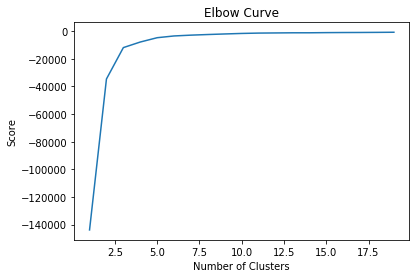

In [38]:
Y=data
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()


In [39]:
X = data.iloc[:,:]
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = stats['label']
dfPCA.head()

,x1,x2,labels
0,-37.639586,-1.650711,2019-01JAN-30-1
1,-22.096571,-2.317817,2019-01JAN-30-1
2,-53.473312,-6.160785,2019-01JAN-30-1
3,-48.830527,0.848080,2019-01JAN-30-1
4,36.030095,-1.356358,2019-01JAN-30-1
5,-29.143339,-1.689777,2019-01JAN-30-1
6,38.748073,-3.401433,2019-01JAN-30-1
7,-12.033063,0.329626,2019-01JAN-30-1
8,17.334041,-6.514483,2019-01JAN-30-1
9,6.225511,-2.425623,2019-01JAN-30-1


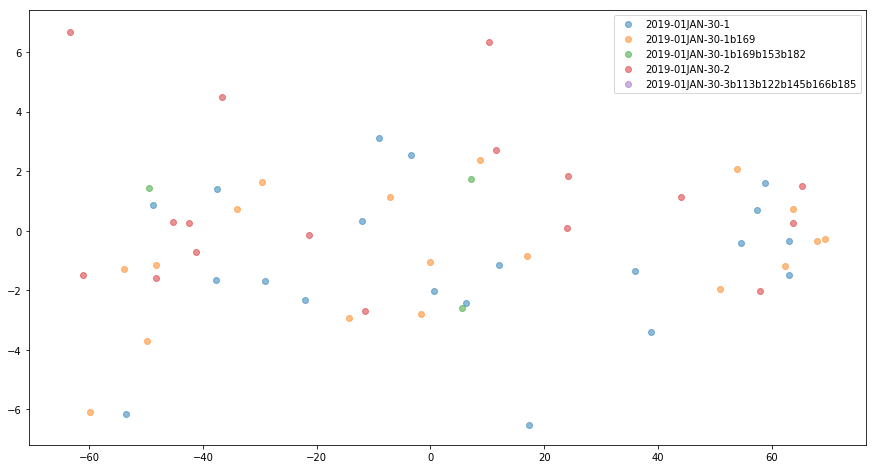

In [40]:
X = data
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = stats['label']
dfPCA.head()
labels = stats['label'].unique().tolist()
plt.figure(figsize=(15,8))
for lab in labels:
    #plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=50)
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab, alpha=0.5)
    plt.legend()